# Understanding Influences of Win Rate in League of Legends
## Phase 2: Statistical Modelling

***
## Group Name: Group 52

## Student Names:

- Anton Angelo Carasig (s306344)
- Khang Nguyen (s3894597)
- Oliver Guzowski (s3897734)

***
## Table of Contents:

- [Introduction](#intro)
- [Statistical Modelling](#sm)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)

***
## Introduction <a id='intro'></a>

### Phase 1 Summary

Phase 1 of our report concluded with the notion that the way players are able to generate, maintain and grow a lead is what enables a higher chance of winning the match. Data visualization techniques illustrate gold and experience to be the main contributive factor in leveraging leads, while secondary components such as kills, especially `First Blood`, are utilized to inhibit the enemy from generating leads of their own. It is likewise noted that common objectives such as `Dragon` and `Herald` within the early 10 minutes of the match are placed at a lower priority despite the team-wide advantages that they offer. 

On a similar note, our literature review exposes certain elements that coincide within high ELO games that the dataset is unable to offer, yet is able to intrinsically highlight certain aspects such as the prominence of `Assists` or neutral objectives within the data. Noting especially the cooperation and functionality of a team as well as their priorities, the flexibility to work effectively within a team demonstrates more external "macro" aspects of the game that is not able to simply be calculated through numerical viewpoint.

It is nevertheless a fact that while these external factors may potentially play a important part in the goal of winning, we are still required to scrutinize and understand how the numerical aspects are able to influence the chances of victory. 

### Report Overview

This report aims to develop a multiple linear regression algorithm that uncovers how various factors within a League of Legends's match can manipulate the winning chances of a team. As such, we will draw attention to the response variable that we wish to explore, `blueWins`. However, such a response variable is of a "binary" categorical feature in that, we are unable to utilize multiple linear regression due to it's binary typing. In order to counteract this issue, we have adjusted the response variable to `blueGoldDiff` - the difference in gold between the blue and red sides of the game. This is chosen as a response variable since "gold" is a valuable resource within a match that allows a player to purchase an item or consumable from a shop that will provide additional benefits, whether it is simply a boost in stat or a passive/active skill. Additionally, since the data primarily compose of high ranked players, it is safe to assume that such players are knowledgeable about the items they require to boost their champions.

### Overview of Methodology

Multiple Linear Regression (MLR) will be utilized within this report. The aforementioned technique will enable us to make more accurate predictions about our target variable `blueGoldDiff`, uncovering how certain variables influence the result of our response variable. The end result aims to generate a linear model between such independent variables and our response variable, sharing a more accurate representation on what aspects of a LoL match should be prioritized to maximize the chances of winning.

***
## Statistical Modelling <a id='sm'></a>

### Model Overview

Our model will undergo the same cleaning process as in phase 1 prior to statistical modelling. However due to the change in target variable, we will drop several unnecessary features that do not offer meaningful value to the dependent variable. 

Once the dataframe is clean we will fit a multiple linear regression that predicts `blueGoldDiff` and likewise ensure that the model passes diagnostic checks that may potentially violate the regression formula.

#### Module Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('ranked_games.csv')
df = df.sample(n=5000, random_state=999)

We will drop the columns that we're similarly dropped in the first phase of our report:

In [73]:
df = df.drop(columns=["gameId", 
                      "blueEliteMonsters", 
                      "redEliteMonsters", 
                      "redGoldDiff", 
                      "blueExperienceDiff", 
                      "redExperienceDiff", 
                      "blueCSPerMin", 
                      "redCSPerMin", 
                      "blueGoldPerMin", 
                      "redGoldPerMin",
                      "redFirstBlood"])

We then drop all the redTeams columns due to the fact that we are analyzing what factors can lead a player into winning a match, since the redTeam is classified as the opposing team of the player, it is not useful in the analysis. 

In [74]:
df = df.drop(columns=['redWardsPlaced',
 'redWardsDestroyed',
 'redKills',
 'redDeaths',
 'redAssists',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled'])

We will sample a random 10 matches to look at our new cleaned dataframe.

In [75]:
df.sample(10, random_state = 999)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff
886,0,17,8,1,8,5,12,1,0,0,17551,6.6,17463,237,43,1763
4123,0,11,1,0,3,5,4,1,0,0,13770,6.4,15846,192,33,-2374
8233,0,33,4,1,5,7,6,1,0,0,15534,7.0,17293,207,44,-1109
815,1,16,2,1,3,2,3,1,0,0,15574,6.8,17686,217,68,-100
4518,1,12,4,0,4,4,4,0,1,0,15607,7.0,18678,215,57,-315
5095,1,18,3,1,9,6,6,1,1,0,17673,7.2,19727,208,68,1369
8377,0,15,3,0,7,5,7,1,0,0,16424,7.0,17990,205,60,427
2442,1,48,5,0,6,3,8,1,0,0,17612,7.6,19905,246,68,2356
8787,0,16,0,1,10,9,10,0,0,0,18034,6.8,17170,211,43,1179
4795,1,16,3,0,10,5,13,1,0,0,19134,7.6,20399,227,71,3440


***
## Model Fitting

Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.

**NOTE:** The second half of [this](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this Model Fitting section.

### Full Model

First, we create a formula string that will be used in created our model fitting through statsmodels module. Using a join method from Python, we can get the names of all the independent variable from the table (after we drop our response variable `blueGoldDiff`) as a string, and then add it to the formula string:

In [76]:
column_names = " + ".join(df.drop(columns = 'blueGoldDiff').columns)
formula_string = 'blueGoldDiff ~ ' + column_names
print("formula_string: " + formula_string)

formula_string: blueGoldDiff ~ blueWins + blueWardsPlaced + blueWardsDestroyed + blueFirstBlood + blueKills + blueDeaths + blueAssists + blueDragons + blueHeralds + blueTowersDestroyed + blueTotalGold + blueAvgLevel + blueTotalExperience + blueTotalMinionsKilled + blueTotalJungleMinionsKilled


We then create our OLS (ordinary least squares) full model using the formula string and display it below:

In [77]:
model_full = sm.formula.ols(formula = formula_string, data = df)
model_full_fitted = model_full.fit()

print("Dataframe summary:")
print("====================================\n")
print(df.describe())

print("\n ==================================== \n")

print(model_full_fitted.summary())

Dataframe summary:

          blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
count  5000.000000      5000.000000          5000.00000     5000.000000   
mean      0.485000        22.066400             2.84620        0.492600   
std       0.499825        17.186398             2.23695        0.499995   
min       0.000000         5.000000             0.00000        0.000000   
25%       0.000000        14.000000             1.00000        0.000000   
50%       0.000000        16.000000             3.00000        0.000000   
75%       1.000000        20.000000             4.00000        1.000000   
max       1.000000       209.000000            25.00000        1.000000   

         blueKills   blueDeaths  blueAssists  blueDragons  blueHeralds  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.00000   
mean      6.102200     6.173200     6.579600     0.357000      0.18860   
std       2.970104     2.954208     4.009698     0.479163      0.39123   
min     

The full model has an adjusted R-squared value of 0.934, which means that 93% of the variance is explained by the model. By looking at the p-values, we observe that there are a few significant variables at a 5% level.

We then continue with our fitted model by creating a new data frame for actual `blueGoldDiff` vs. predicted `blueGoldDiff`. We will use this data frame when plotting predicted values and the regression resdiuals.

In [78]:
residuals_full = pd.DataFrame({'actual': df['blueGoldDiff'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
4387,-1641,-1389.745782,-251.254218
3500,-729,-243.664870,-485.335130
790,3936,4493.344286,-557.344286
7993,1716,1517.906886,198.093114
4910,10,56.595102,-46.595102
3156,313,885.623801,-572.623801
7490,987,1085.705661,-98.705661
6340,-1348,-1211.443618,-136.556382
7662,1680,1650.132717,29.867283
210,540,-238.239869,778.239869


We will now plot actual `blueGoldDiff` vs. predicted `blueGoldDiff`.

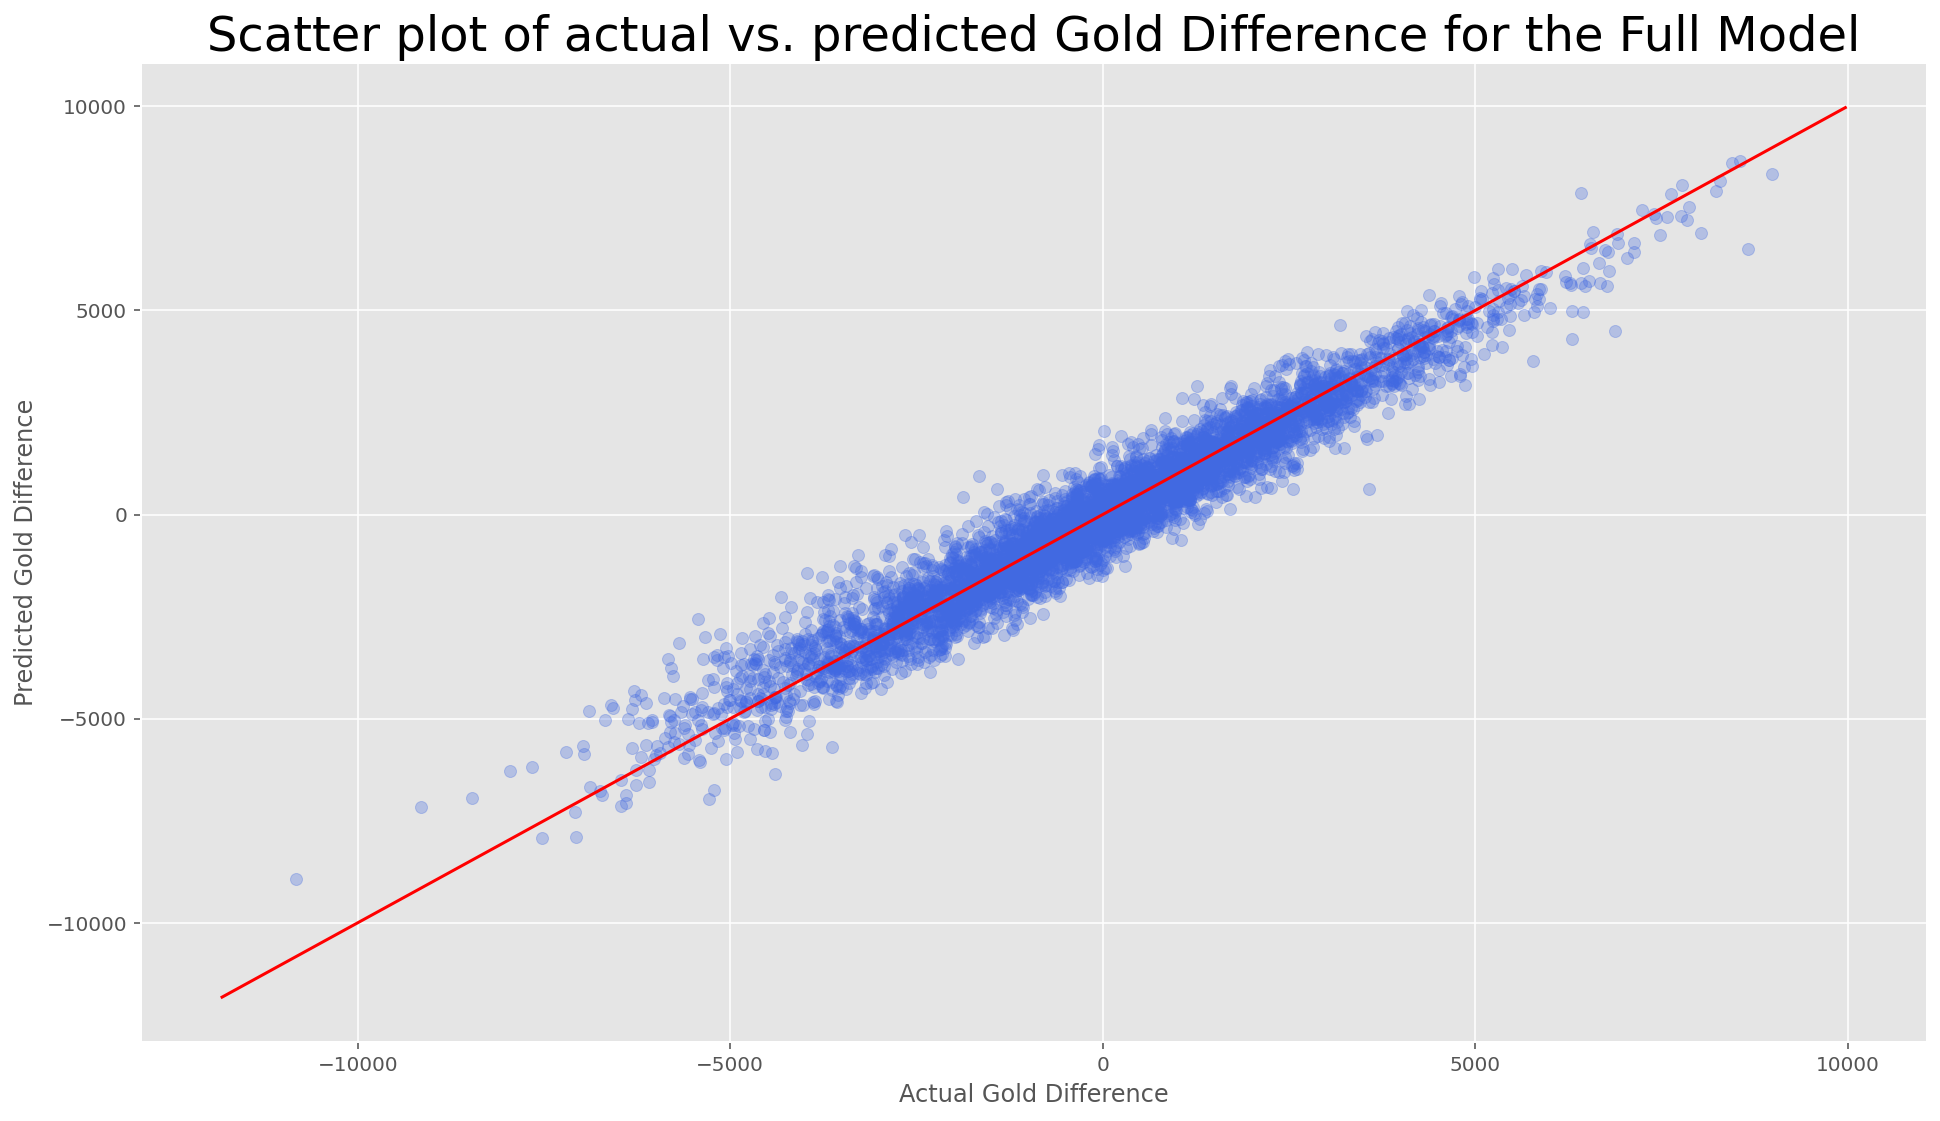

In [79]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, c='royalblue');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Gold Difference');
plt.ylabel('Predicted Gold Difference');
plt.title('Scatter plot of actual vs. predicted Gold Difference for the Full Model', fontsize=24);
plt.show();

From the above scatterplot, we observe that there exists a prediction for every match and there are no extreme outliers within the predictions.

### Checking the Full Model Conditions

We now check whether there are violations of the regression conditions, which are the following:
1. The residuals of the model are nearly normal
2. The variability of the residuals are nearly constant
3. The residuals are independent
4. Each variable is linearly related to the outcome

First, we will generate a histogram of the residuals to see whethere the distribution is normal.

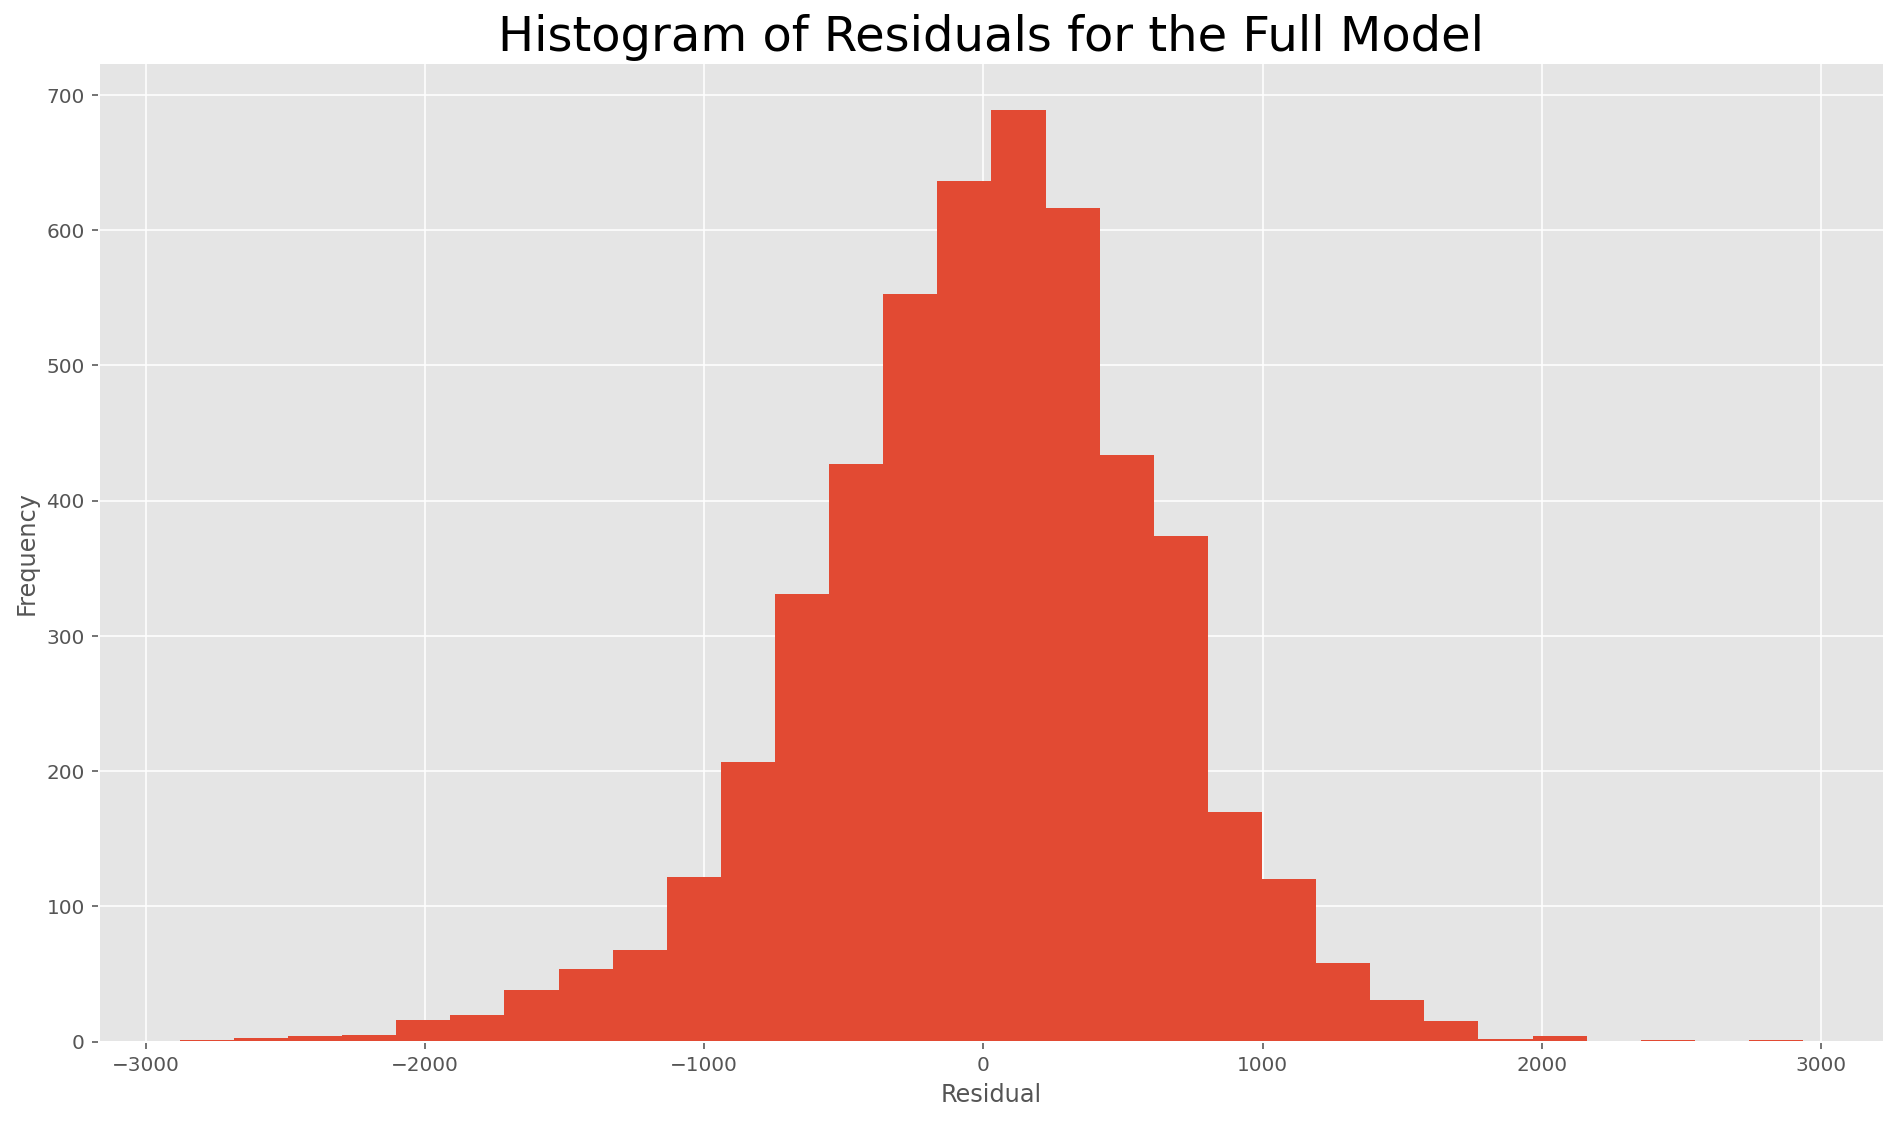

In [80]:
plt.figure(figsize=(16, 9))
plt.hist(residuals_full['residual'], bins = 30);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of Residuals for the Full Model', fontsize=24);
plt.show();

From the histogram of residuals, we observe that the distribution is unimodal and symmetric, it can be said that the first condition, the normality of residuals, is not violated.

Next, we will generate a scatterplot of residuals vs. predicted Gold Difference in order to determine whether the variability of residuals are nearly constant.

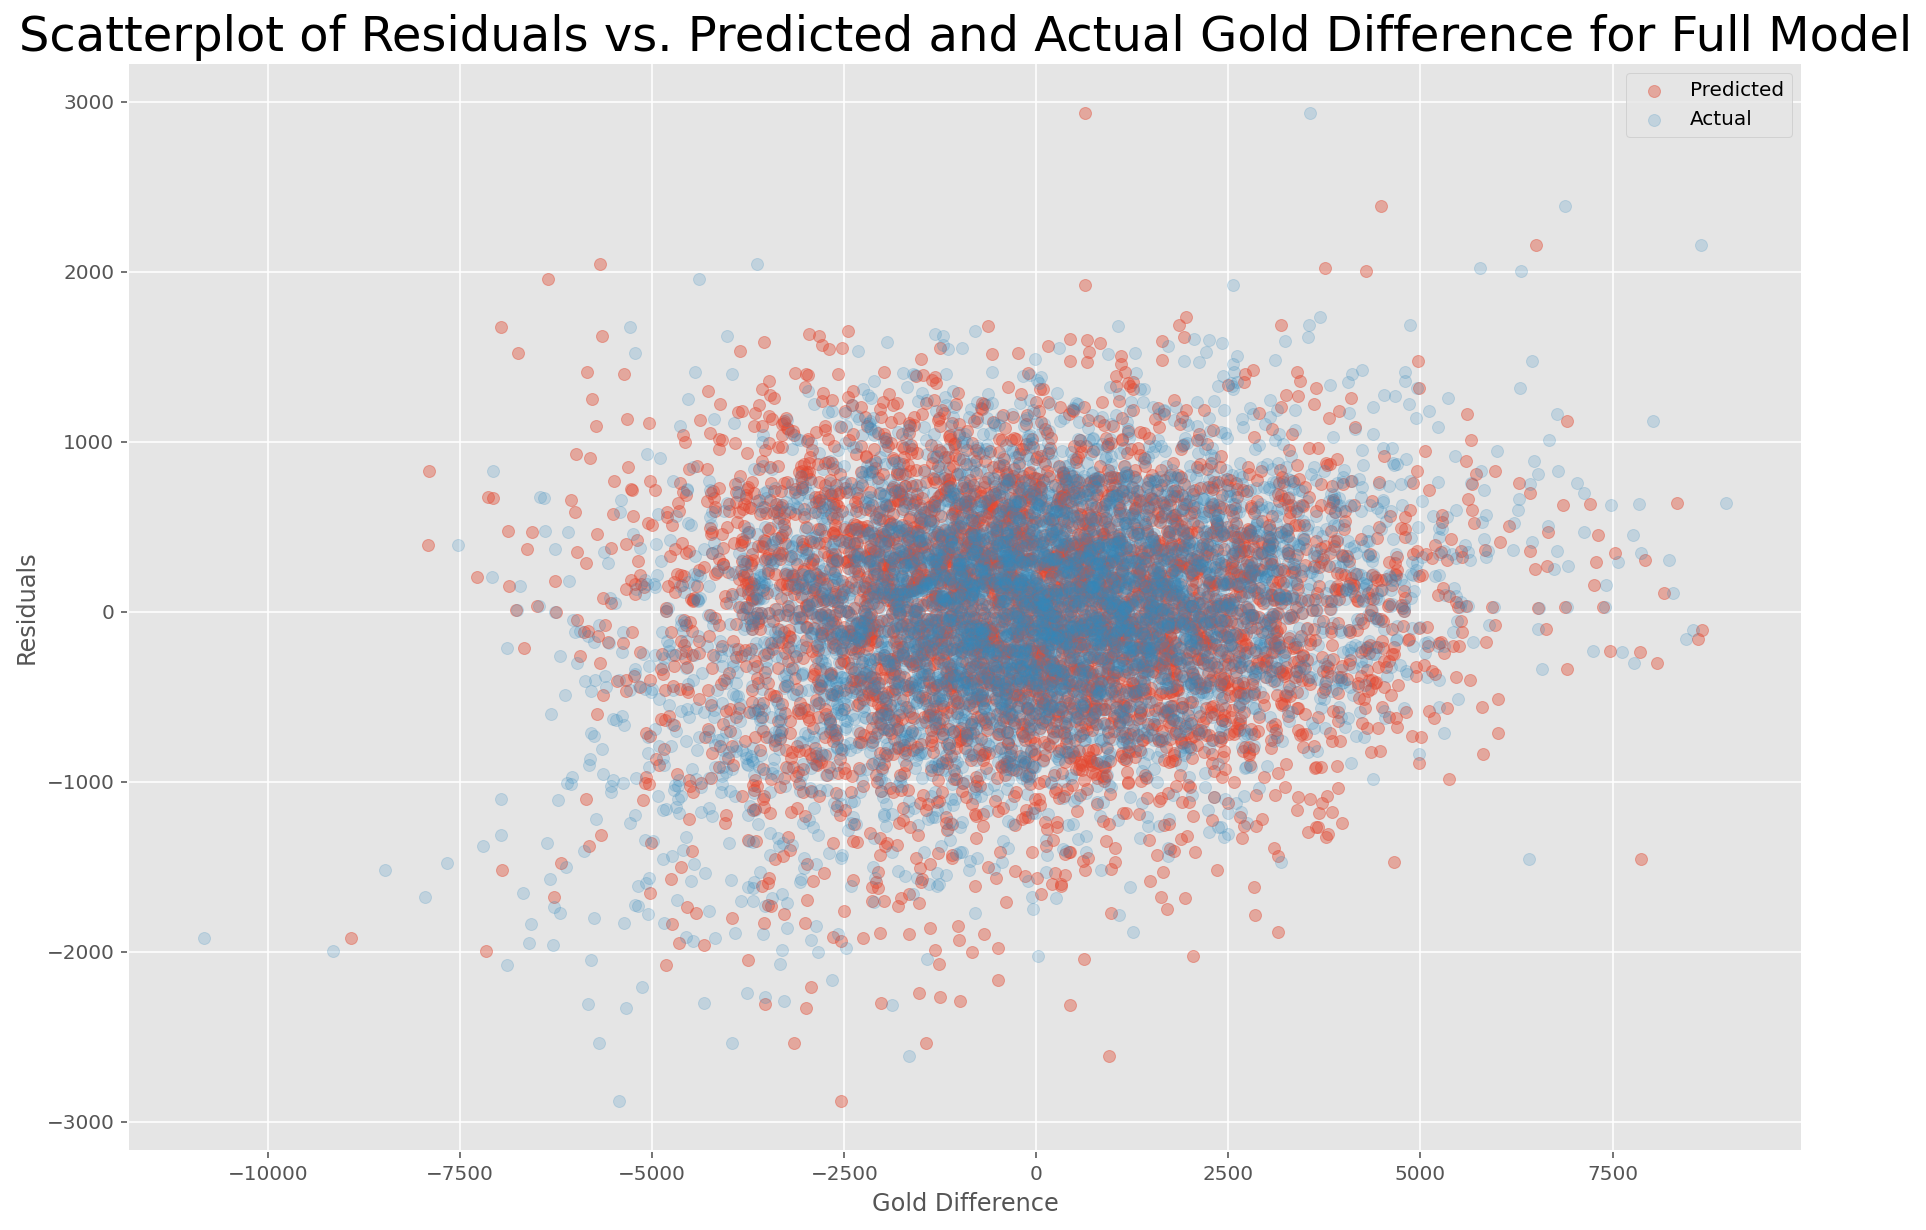

In [81]:
plt.figure(figsize=(15, 10))
predicted = plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.4)
actual = plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.2)
plt.xlabel('Gold Difference')
plt.ylabel('Residuals')
plt.legend([predicted, actual], ['Predicted', 'Actual'])
plt.title('Scatterplot of Residuals vs. Predicted and Actual Gold Difference for Full Model', fontsize=24)
plt.show()

We observe from the scatterplot above, that since the residuals are mostly random and centered around 0, the second conditions, the variability of the residuals are nearly constant, is not breached. In addition, since the distribution of the residuals are random, it can also be concluded that the residuals are independent from one another, leading to no error bias.

We will now overlay the histogram of actual vs. predicted Gold Difference to see whether their distributions are similar to each other or not.

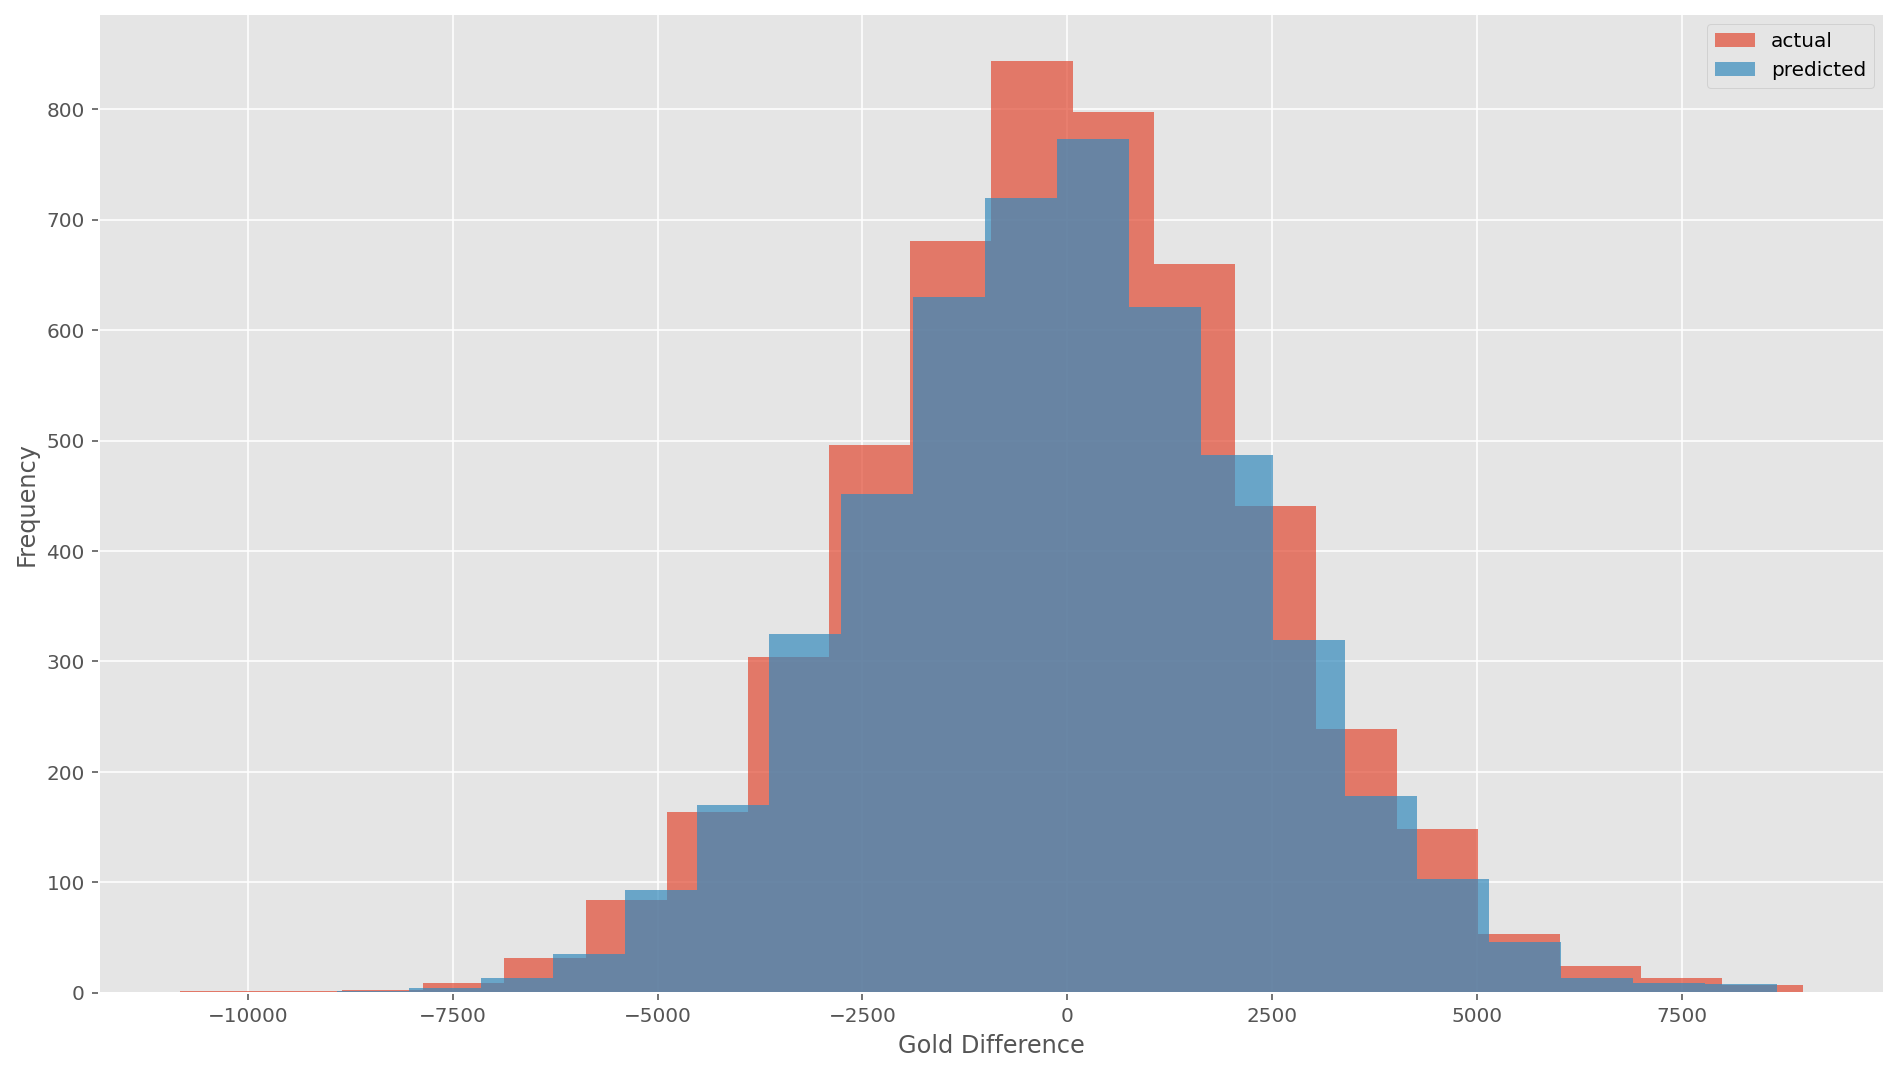

In [82]:
plt.figure(figsize=(16, 9))
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Gold Difference');
plt.ylabel('Frequency');
plt.legend()
plt.show();

We notice that the distribution is nearly identical, meaning that the predicted model has a high confidence in the variance explained by the full model. Such was also deduced when we created a fitted model summary with the adjusted R-value of 0.934.

#### Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb)).

In [83]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "blueHeralds" with p-value 0.9699

Removing term "blueWardsDestroyed" with p-value 0.6423

Removing term "blueWardsPlaced" with p-value 0.5633

Removing term "blueDragons" with p-value 0.1833

Removing term "blueTotalJungleMinionsKilled" with p-value 0.1799

Removing term "blueAvgLevel" with p-value 0.06299

***
                            OLS Regression Results                            
Dep. Variable:           blueGoldDiff   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     7901.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:12:03   Log-Likelihood:                -39283.
No. Observations:                5000   AIC:                         7.859e+04
Df Residuals:                    4990   BIC:                  

After the feature selection have been completed, six features have been removed, which are: `blueHeralds`, `blueHeralds`, `blueWardsDestroyed`, `blueWardsPlaced`, `blueDragons`,`blueTotalJungleMinionsKilled`, and `blueAvgLevel`.

Similar to the full model, we then continue with our fitted model by creating a new data frame for actual `blueGoldDiff` vs. predicted `blueGoldDiff`.

In [84]:
residuals_full = pd.DataFrame({'actual': df['blueGoldDiff'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
4387,-1641,-1389.745782,-251.254218
3500,-729,-243.664870,-485.335130
790,3936,4493.344286,-557.344286
7993,1716,1517.906886,198.093114
4910,10,56.595102,-46.595102
3156,313,885.623801,-572.623801
7490,987,1085.705661,-98.705661
6340,-1348,-1211.443618,-136.556382
7662,1680,1650.132717,29.867283
210,540,-238.239869,778.239869


We will now plot actual `blueGoldDiff` vs. predicted `blueGoldDiff`.

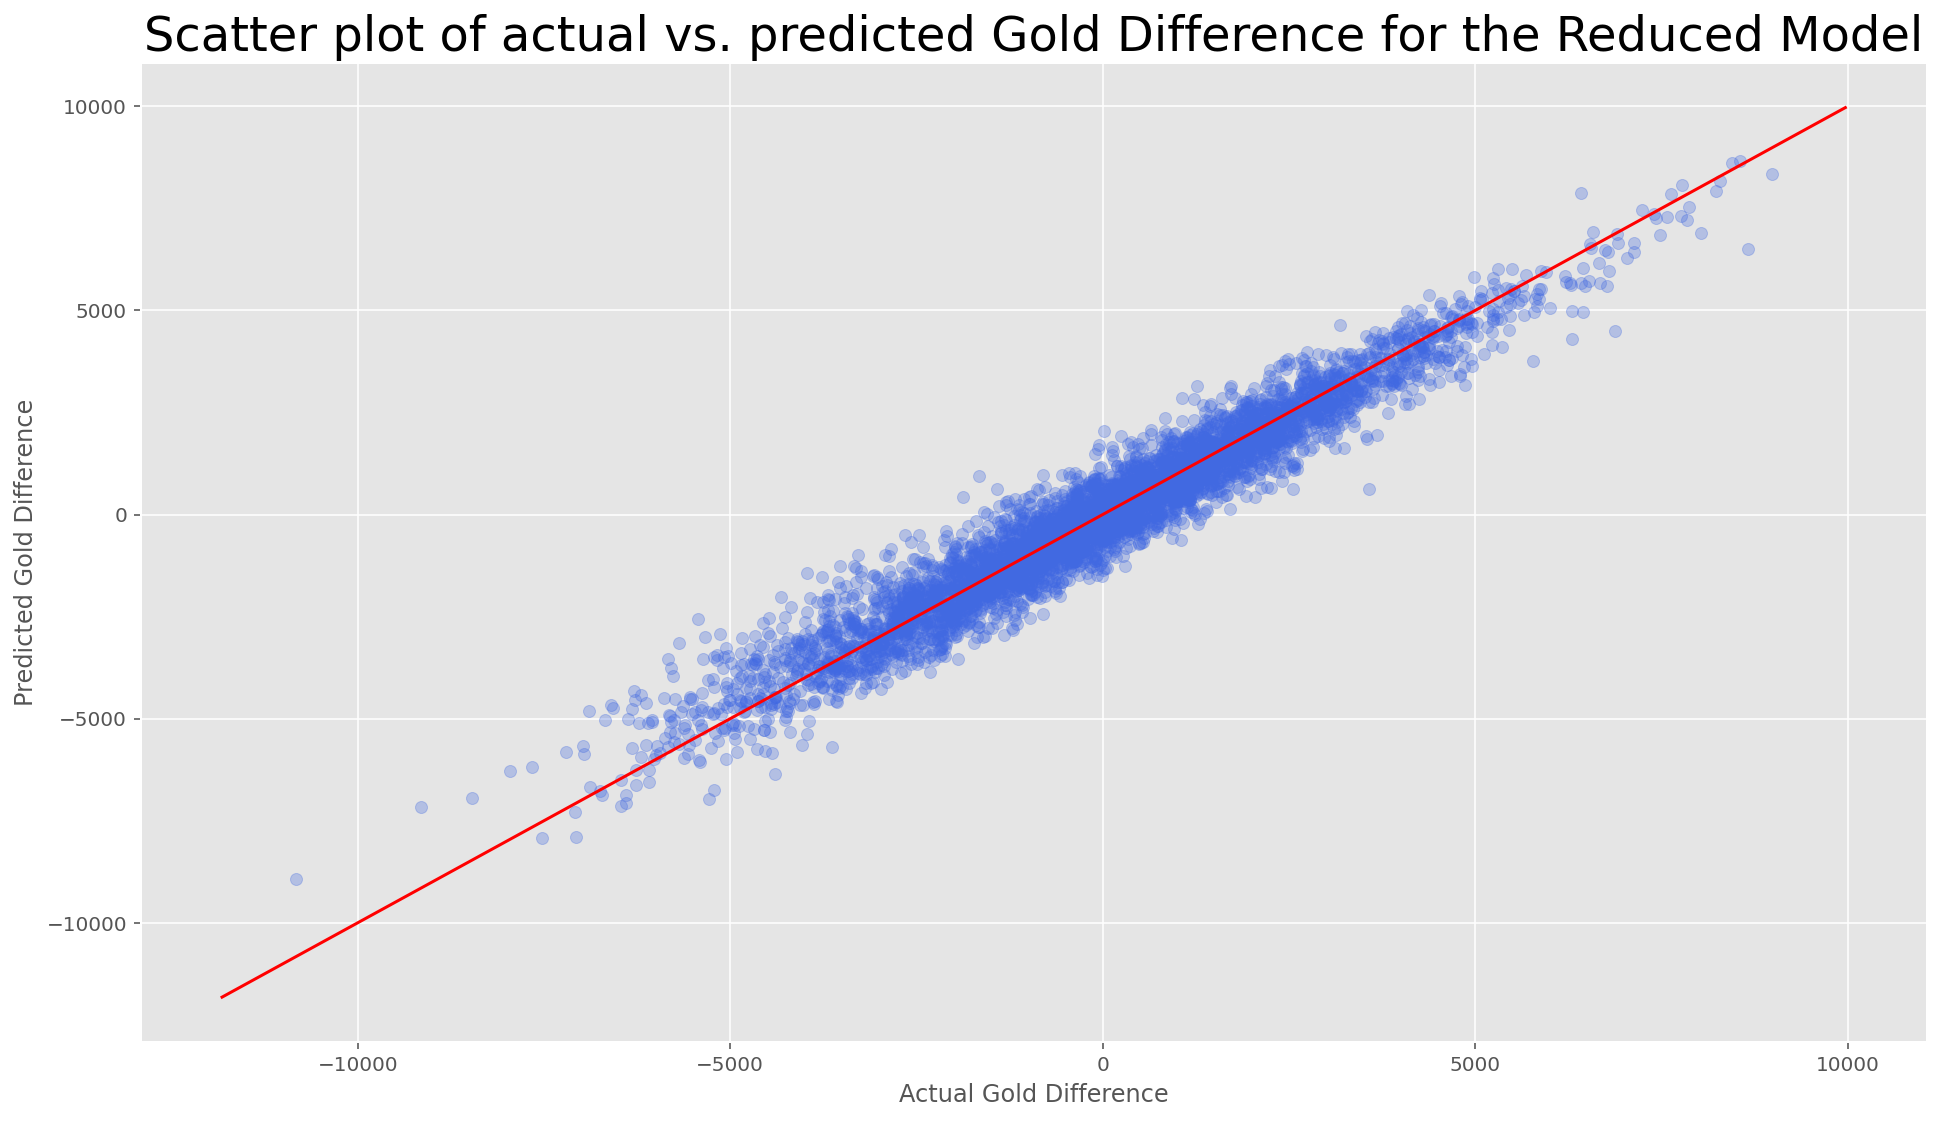

In [85]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, c='royalblue');
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Gold Difference');
plt.ylabel('Predicted Gold Difference');
plt.title('Scatter plot of actual vs. predicted Gold Difference for the Reduced Model', fontsize=24);
plt.show();

From the above scatterplot, we continue to observe that there exists a prediction for every match and there are no extreme outliers within the predictions. Six independent variables have been eliminated from the Full Model, since their p-value indicates that they are significant at the 5% confidence level. However, even with 6 less independent variables, the adjusted r-squared value remains at 0.934, showing that the reduced model still explains 93% of the variance. There seems to be nearly no difference compare to the Full Model.

### Checking the Reduced Model Conditions

First, we will generate a histogram of the residuals to see whethere the distribution is normal.

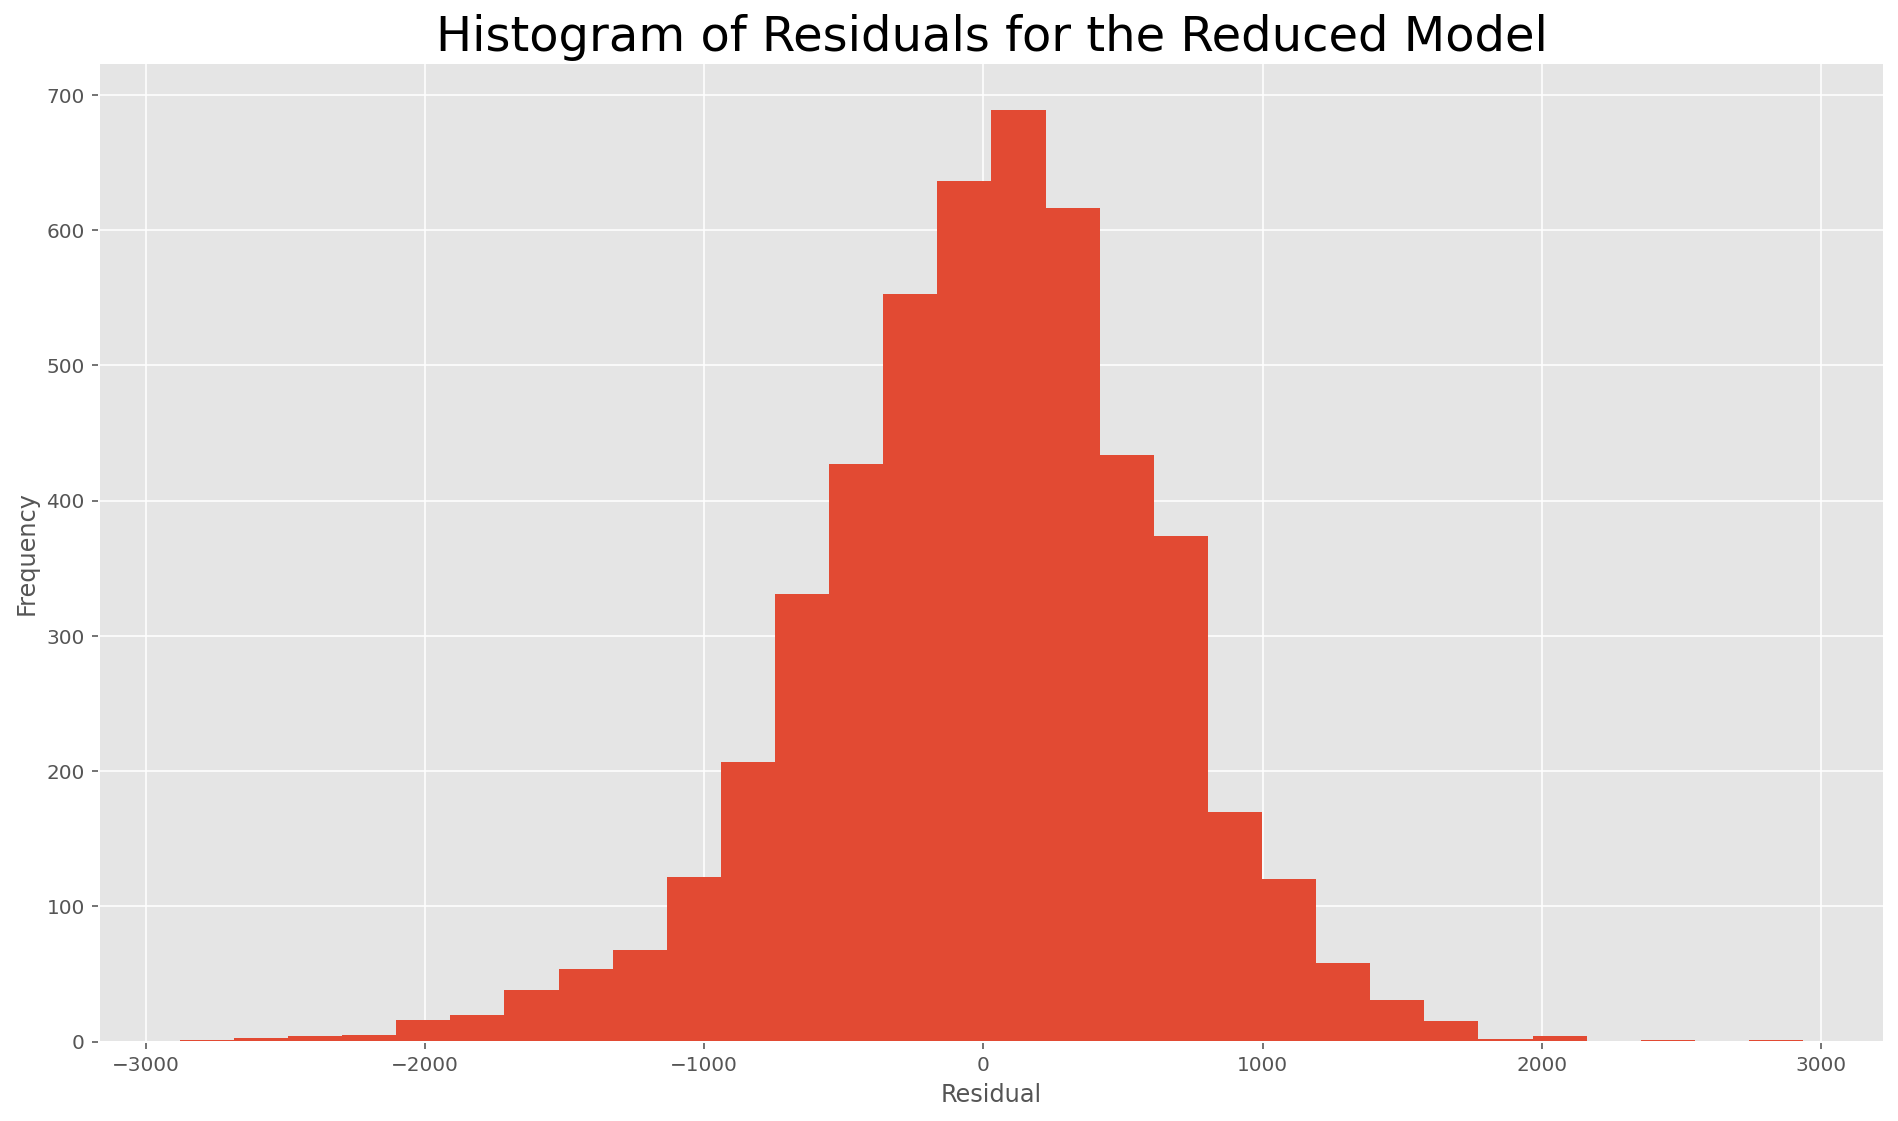

In [86]:
plt.figure(figsize=(16, 9))
plt.hist(residuals_full['residual'], bins = 30);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of Residuals for the Reduced Model', fontsize=24);
plt.show();

From the histogram of residuals, we observe that the distribution remains unimodal and symmetric, it can be said that the first condition, the normality of residuals, is not violated.

Next, we will generate a scatterplot of residuals vs. predicted Gold Difference in order to determine whether the variability of residuals are nearly constant.

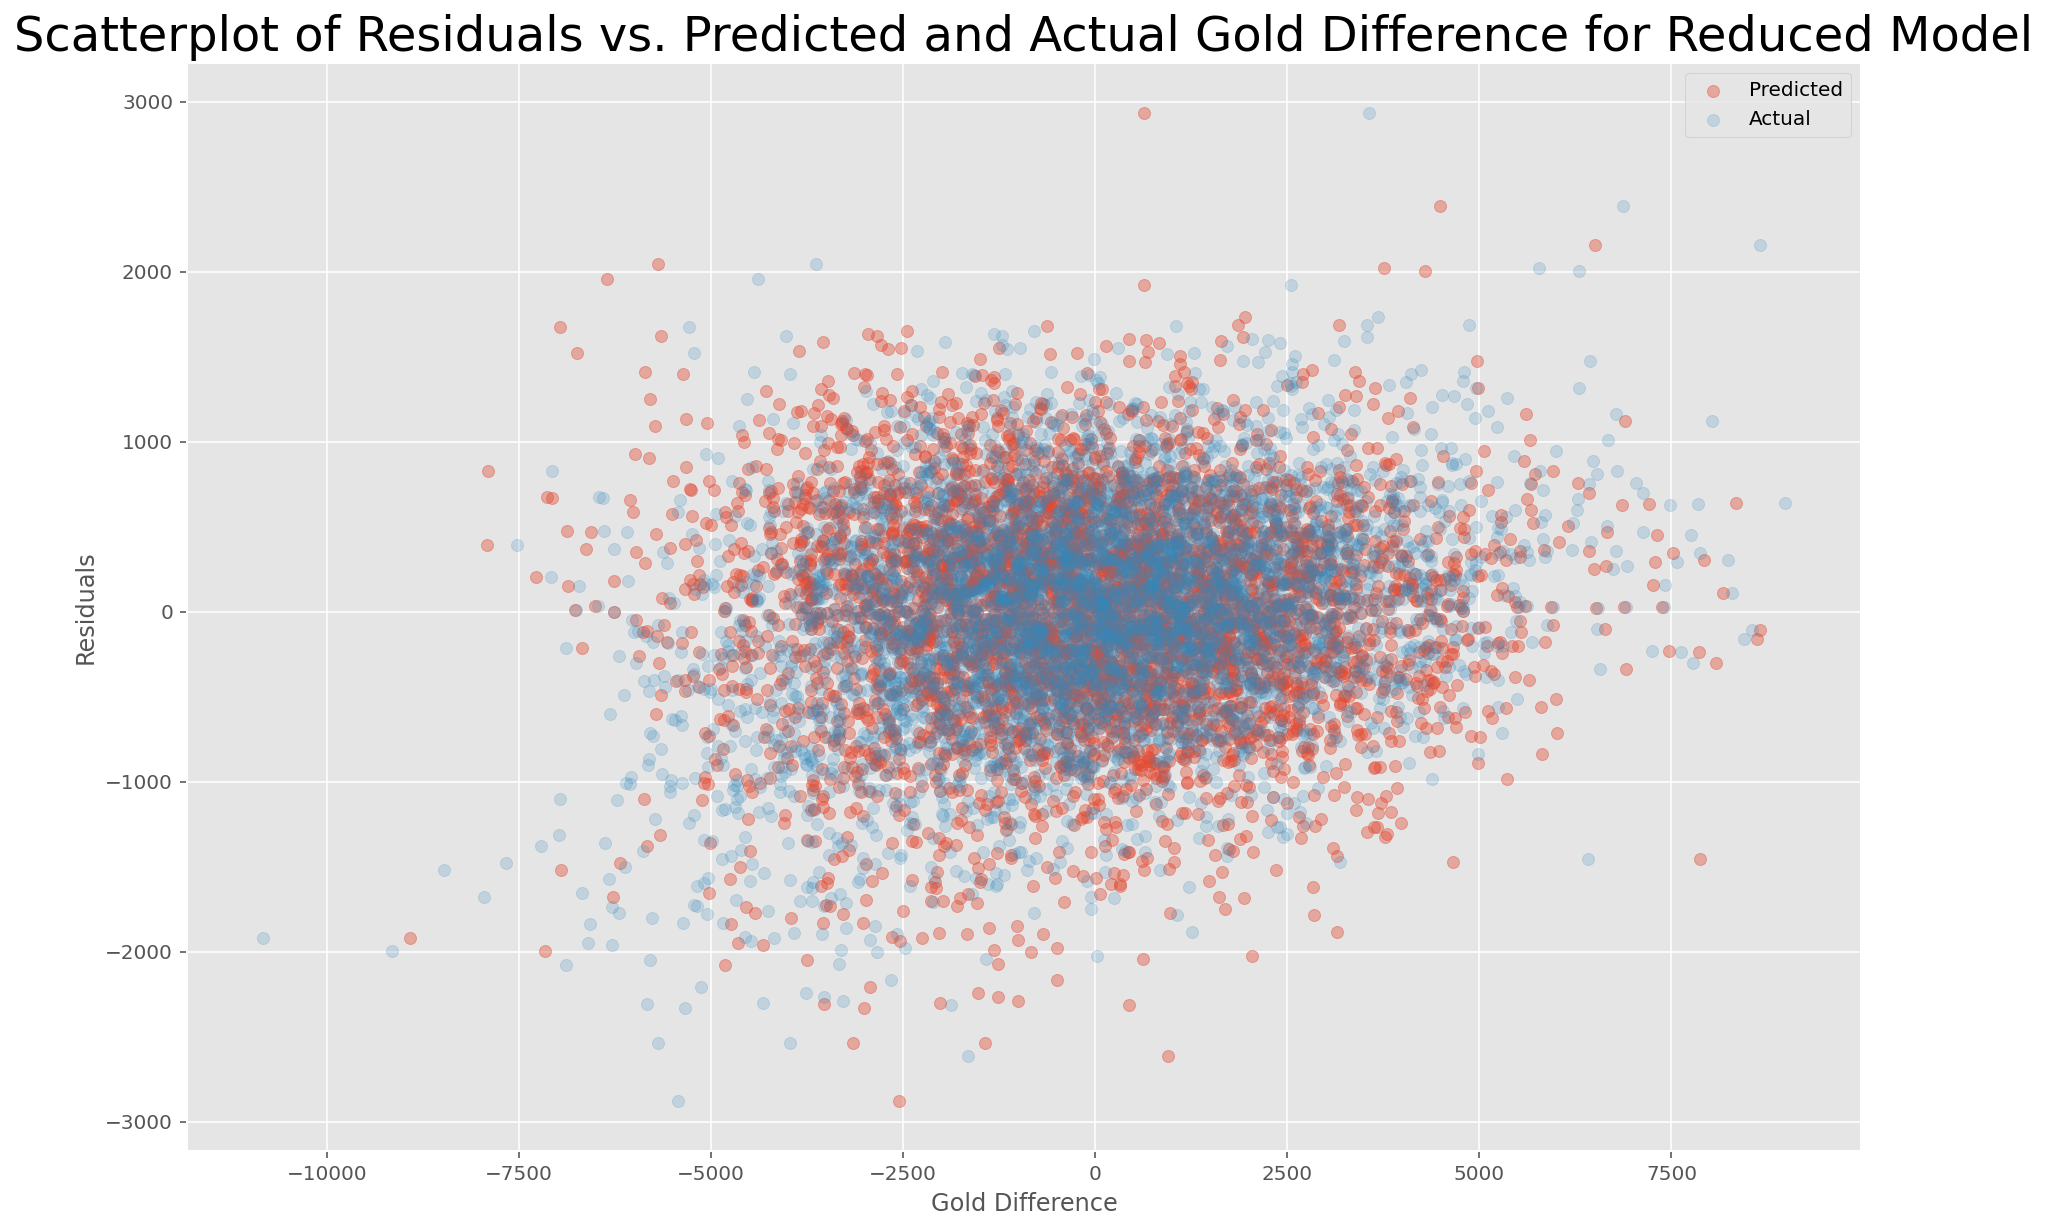

In [87]:
plt.figure(figsize=(15, 10))
predicted = plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.4)
actual = plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.2)
plt.xlabel('Gold Difference')
plt.ylabel('Residuals')
plt.legend([predicted, actual], ['Predicted', 'Actual'])
plt.title('Scatterplot of Residuals vs. Predicted and Actual Gold Difference for Reduced Model', fontsize=24)
plt.show()

We observe from the scatterplot above, that since the residuals remains mostly random and centered around 0, the second conditions, the variability of the residuals are nearly constant, is not breached. In addition, since the distribution of the residuals are still random, it can also be concluded that the residuals are independent from one another, leading to no error bias.

We will now overlay the histogram of actual vs. predicted Gold Difference to see whether their distributions are similar to each other or not.

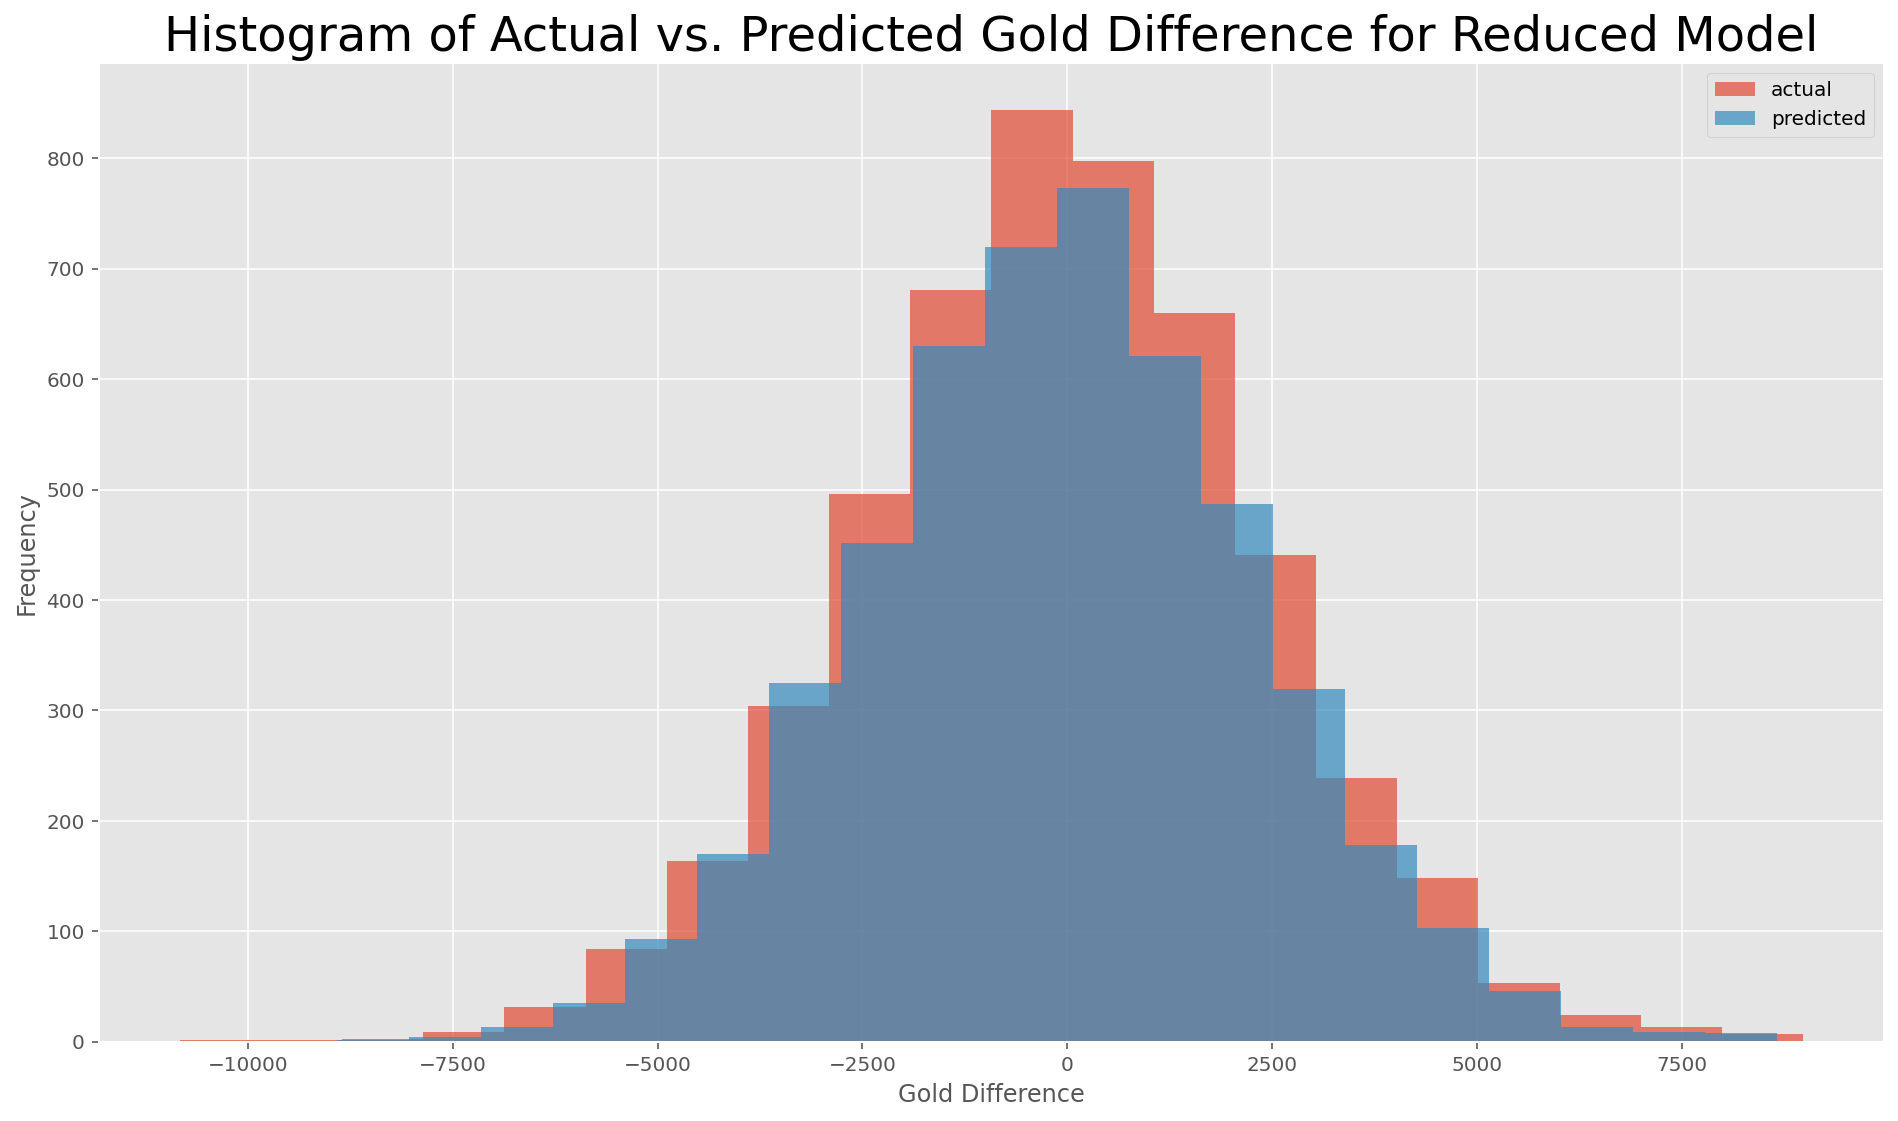

In [88]:
plt.figure(figsize=(16, 9))
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Gold Difference');
plt.ylabel('Frequency');
plt.legend()
plt.title('Histogram of Actual vs. Predicted Gold Difference for Reduced Model', fontsize=24)
plt.show();

We notice that the distribution remains nearly identical, meaning that the predicted model still has a high confidence in the variance explained by the full model.

***
## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

***
## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.